### __Notebook Imports__

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

### __Gather Data__
[Source: Original research paper](https://www.sciencedirect.com/science/article/abs/pii/0095069678900062?via%3Dihub)

In [0]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

#### __Questions about new data set:__
* sourse of the data
* description of the data set
* number of data points
* number of features
* names of the features
* description of the features

In [4]:
dir(boston_dataset) # list of attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### __Data points and features__

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in thousands (000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

#### __Data exploration with Pandas dataframes__

In [0]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [11]:
data.head() # The top rows look like this

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [12]:
data.tail() # Rows at bottom of dataframe look like this:

CRIM   ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
501  0.06263  0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959  0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741  0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[5 rows x 14 columns]

In [13]:
data.count() # Shoe us the number of rows (instances - objects)

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

#### __Cleaning data - check for missing values__

In [14]:
pd.isnull(data).any() # false - no missing values, true - missing values

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info() # show the whole bunch of information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


#### __Visualising Data - Histograms, Distributions and Bar Charts__

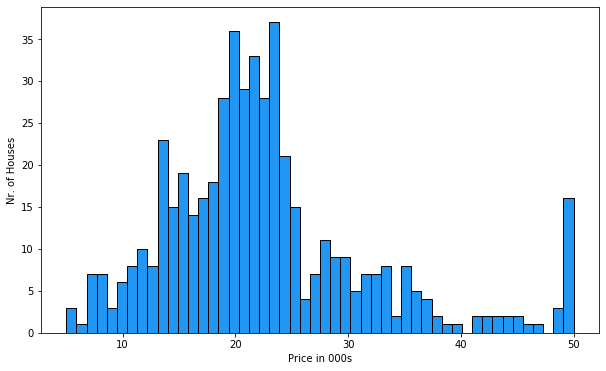

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

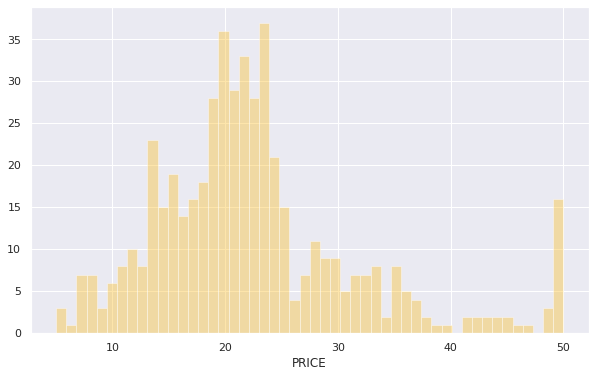

In [17]:
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d') # hist, kde - show/hide bars or PDF line
plt.show()
# The line below is the Probability Density Function (PDF) - estimates the distribution of the data

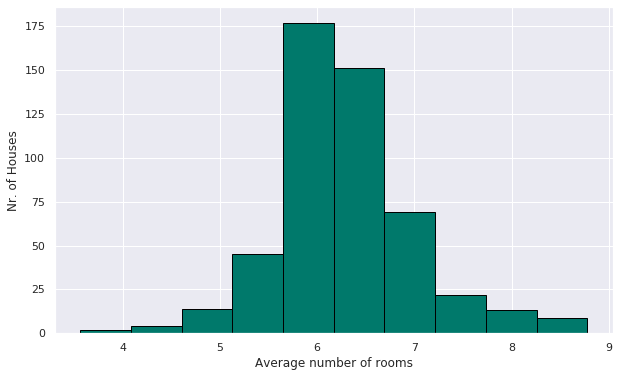

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average number of rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351787

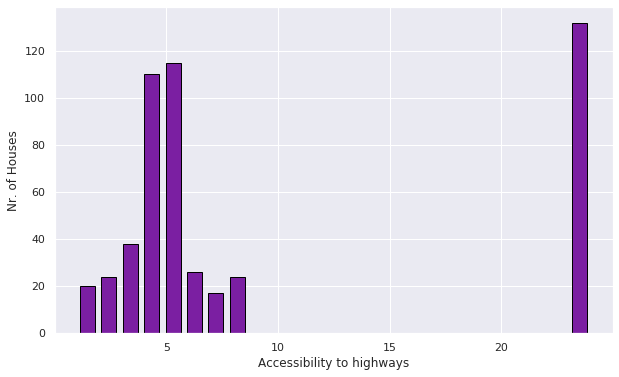

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.7)
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [21]:
data['RAD'].value_counts() # explore the number of each value

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

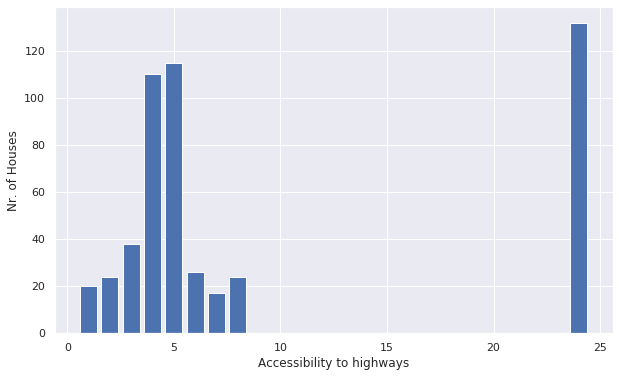

In [22]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### __Descriptive Statistics__
* Smallest value
* Largest value
* Mean value
* Median value

In [24]:
data['PRICE'].min()

5.0

In [25]:
data['PRICE'].max()

50.0

In [26]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [27]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [28]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [29]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [30]:
data.describe()

CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

### __Correlation__
* Strength
* Direction

$$ \rho _(XY) = corr(X, Y)$$

$$ -1.0 \leq \rho _(XY) \leq +1.0 $$

In [31]:
data["PRICE"].corr(data['RM'])

0.6953599470715393

In [32]:
data["PRICE"].corr(data['PTRATIO'])

-0.5077866855375616

In [33]:
data.corr() # shows Pearson correlation coefficients between all features. 
#Pearson correlation is valid only for continuous values.

CRIM        ZN     INDUS  ...         B     LSTAT     PRICE
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.366087  1.000000 -0.737663
PRICE   -0.388305  0.360445 -0.483725  ...  0.333461 -0.737663  1.000000

[14 rows x 14 columns]

High correlation between features can be problematic for the regression model, because it is difficult to see in this case the individual impact of each feature. The result may lead to a __multicollinearity__.

In [34]:
# filter array
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

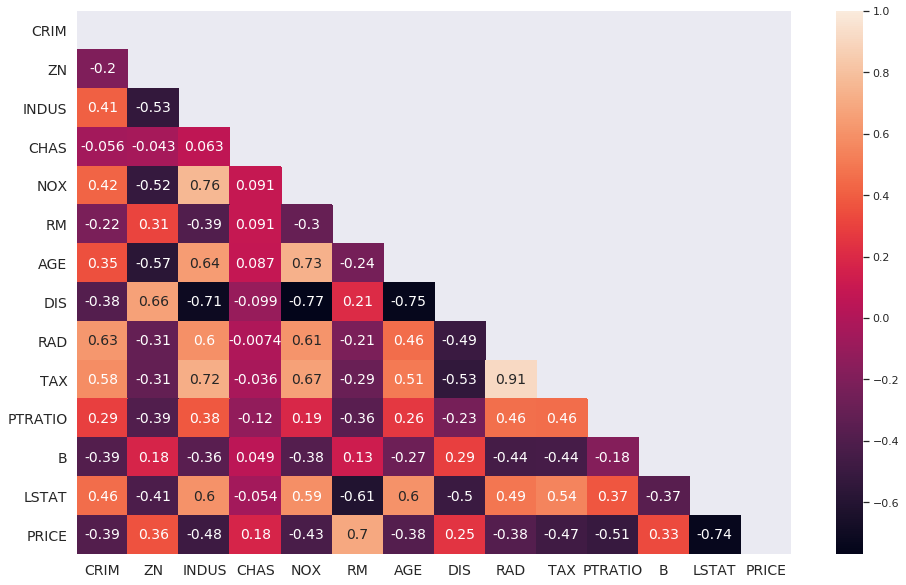

In [35]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

1. Identified strong correlation
2. ToDo: simplify by excluding irrelevant data?
3. ToDo: test for multicollinearity

In [0]:
# it is important to know how each feature is measured. In our case 'RAD' is a discrete feature, which means that Pearson correlation is not valid for it

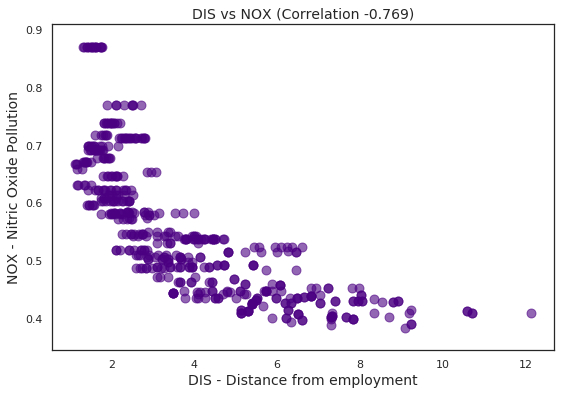

In [37]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)

plt.show()

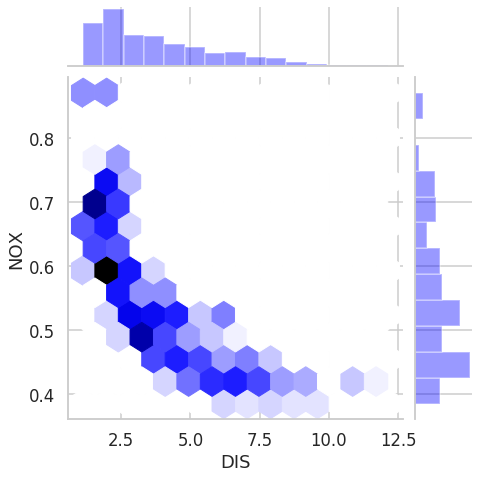

In [38]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='blue', joint_kws={'alpha':0.5})
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=7, color='blue')
plt.show()

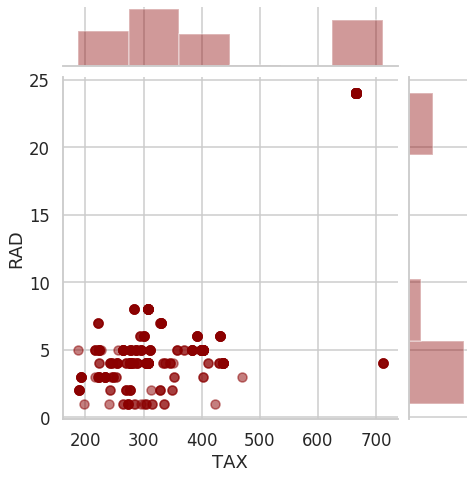

In [39]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


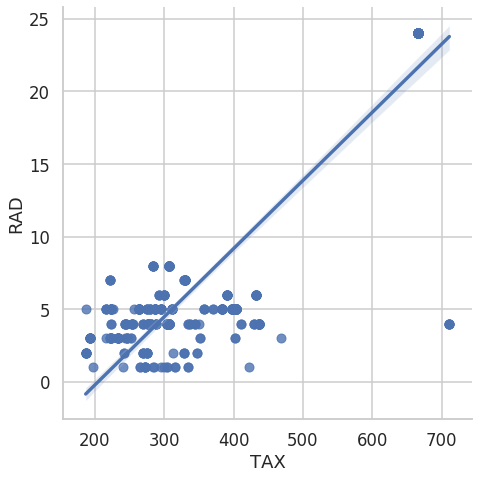

In [40]:
sns.lmplot(x='TAX', y='RAD', data=data, size=7)
plt.show()

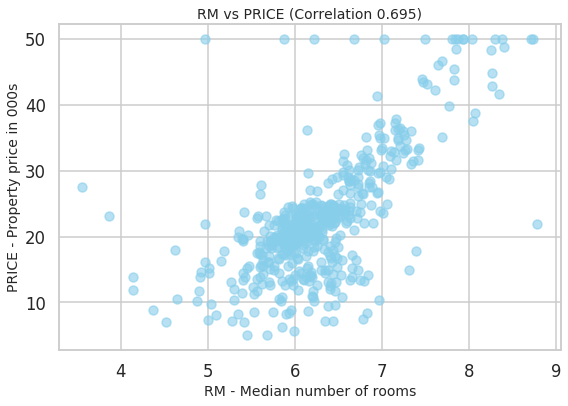

In [41]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median number of rooms', fontsize=14)
plt.ylabel('PRICE - Property price in 000s', fontsize=14)

plt.show()

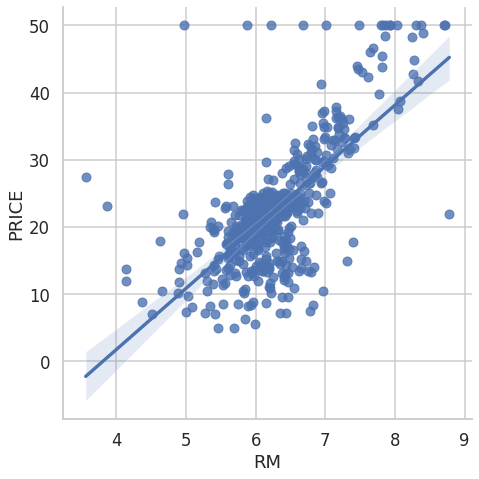

In [42]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)

plt.show()

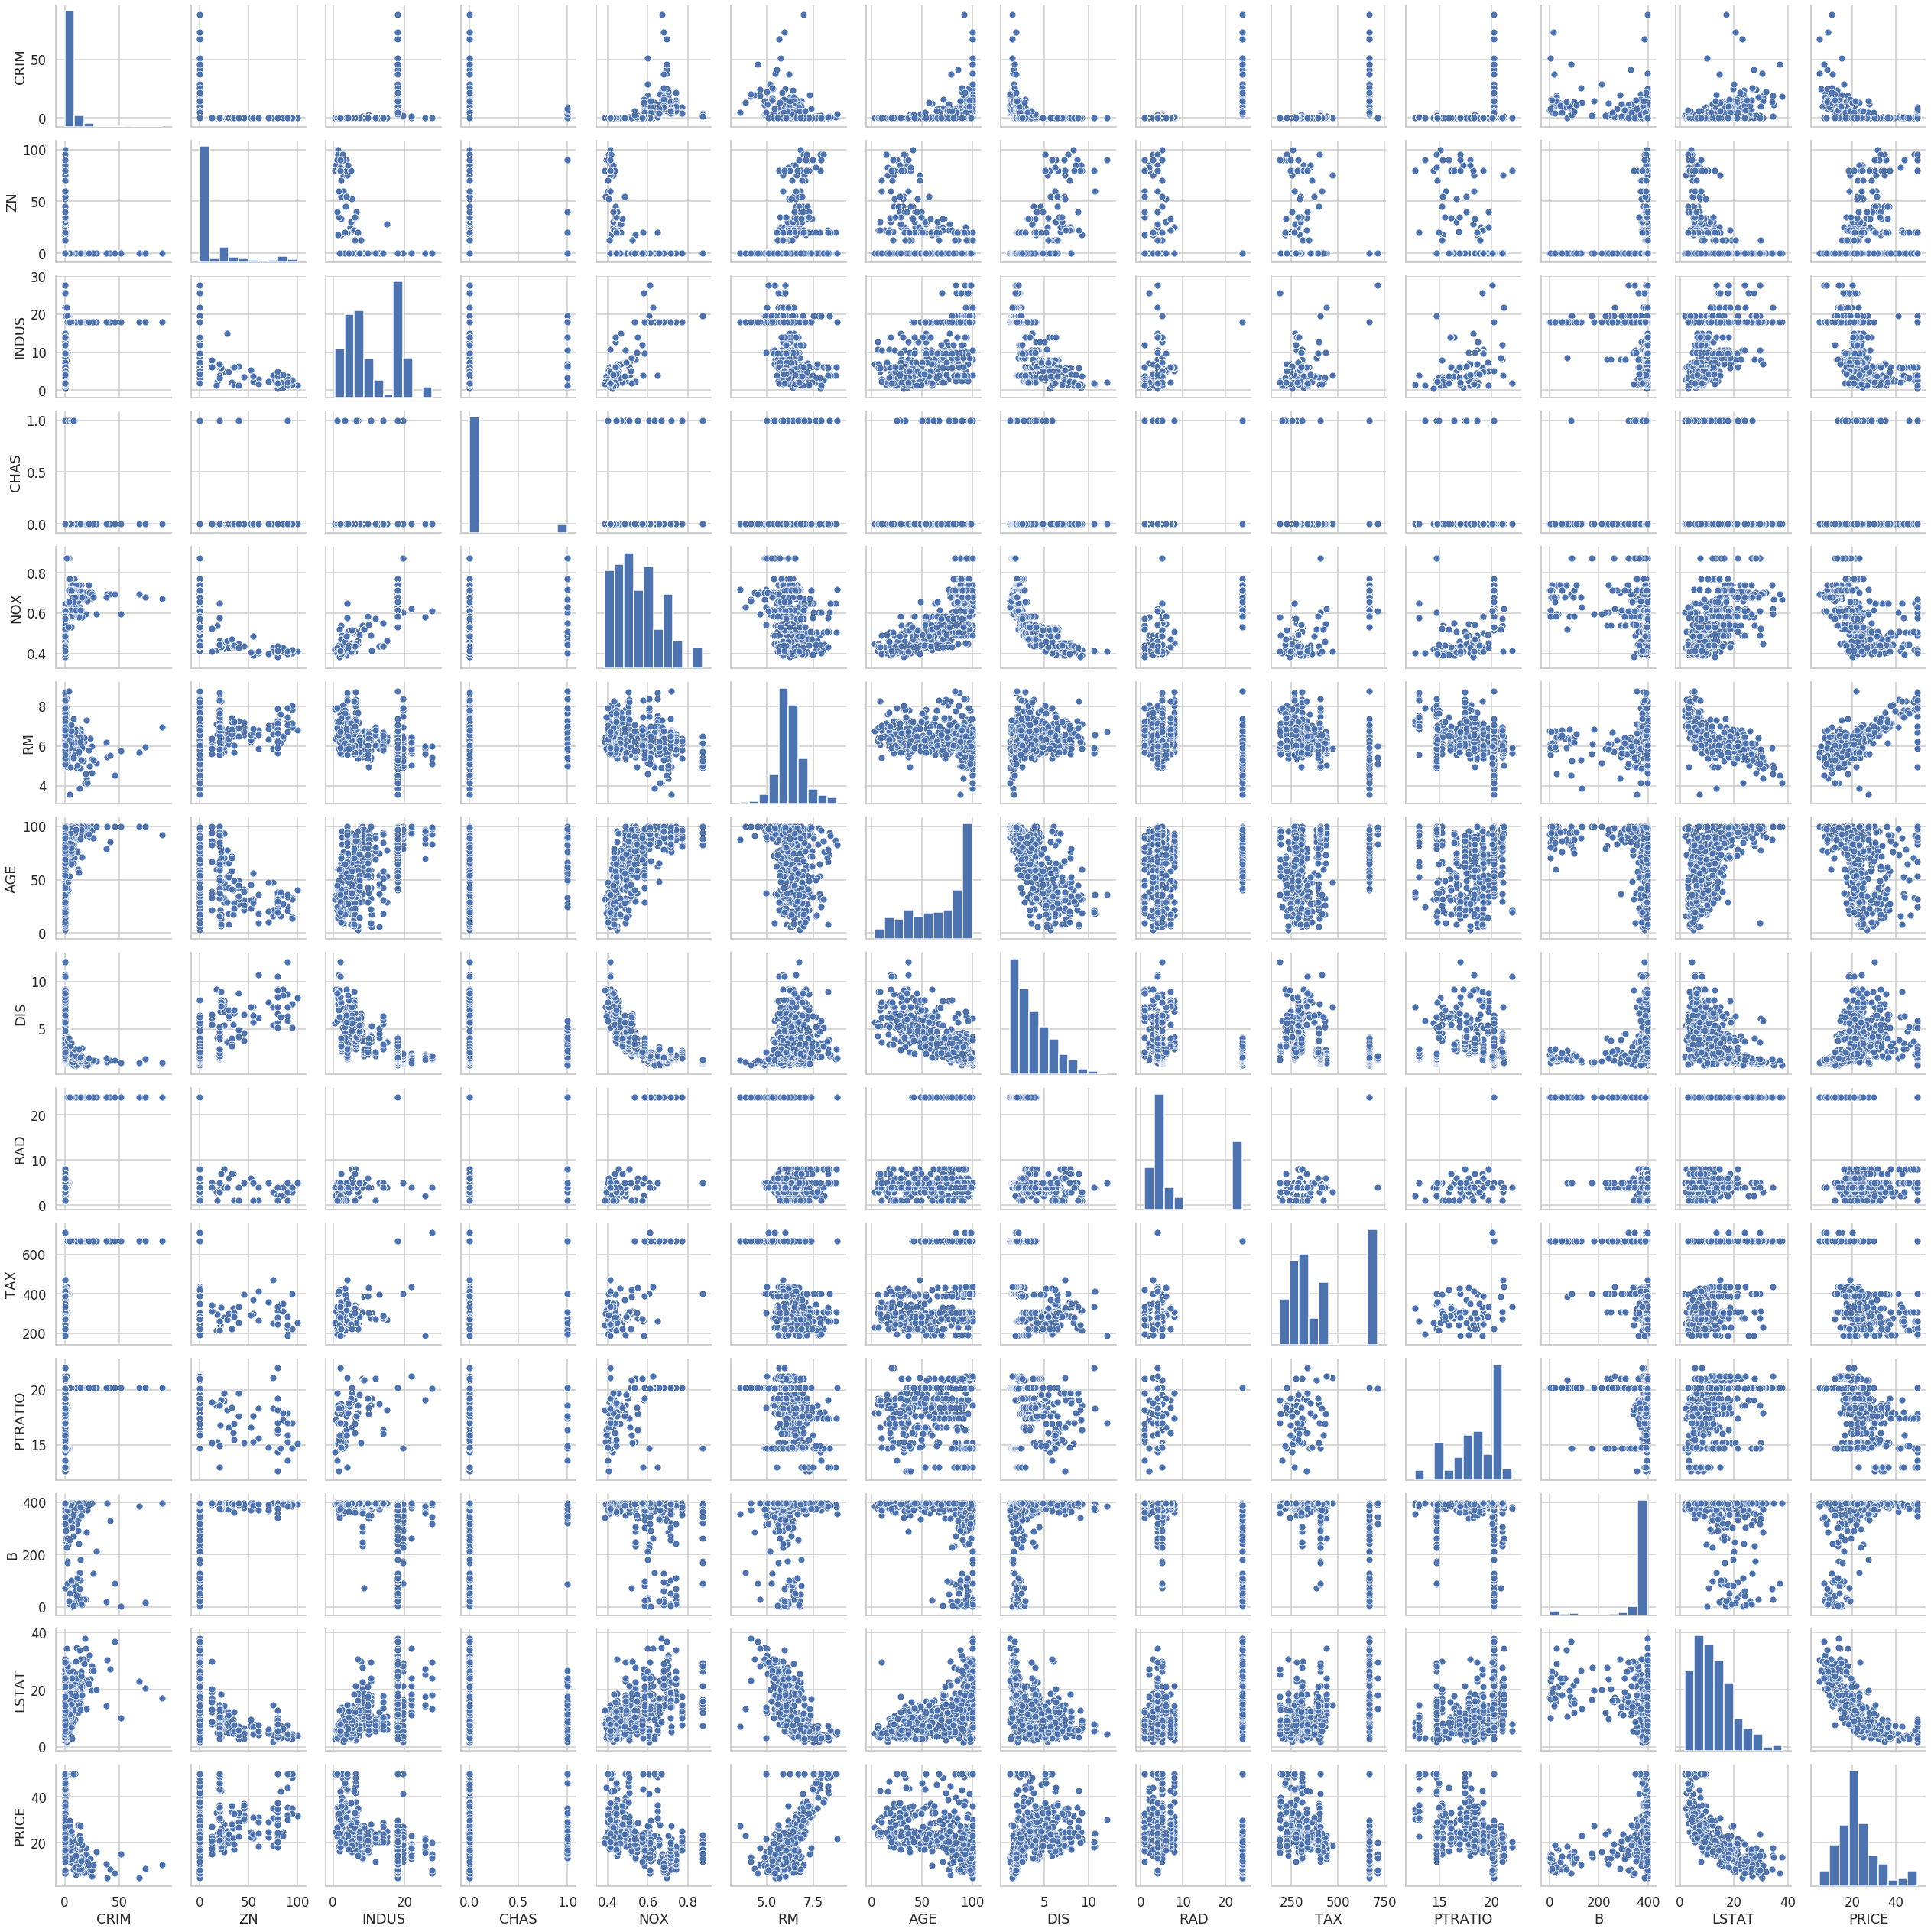

CPU times: user 50.5 s, sys: 6.06 s, total: 56.6 s
Wall time: 49.5 s


In [43]:
%%time

sns.pairplot(data)
plt.show()

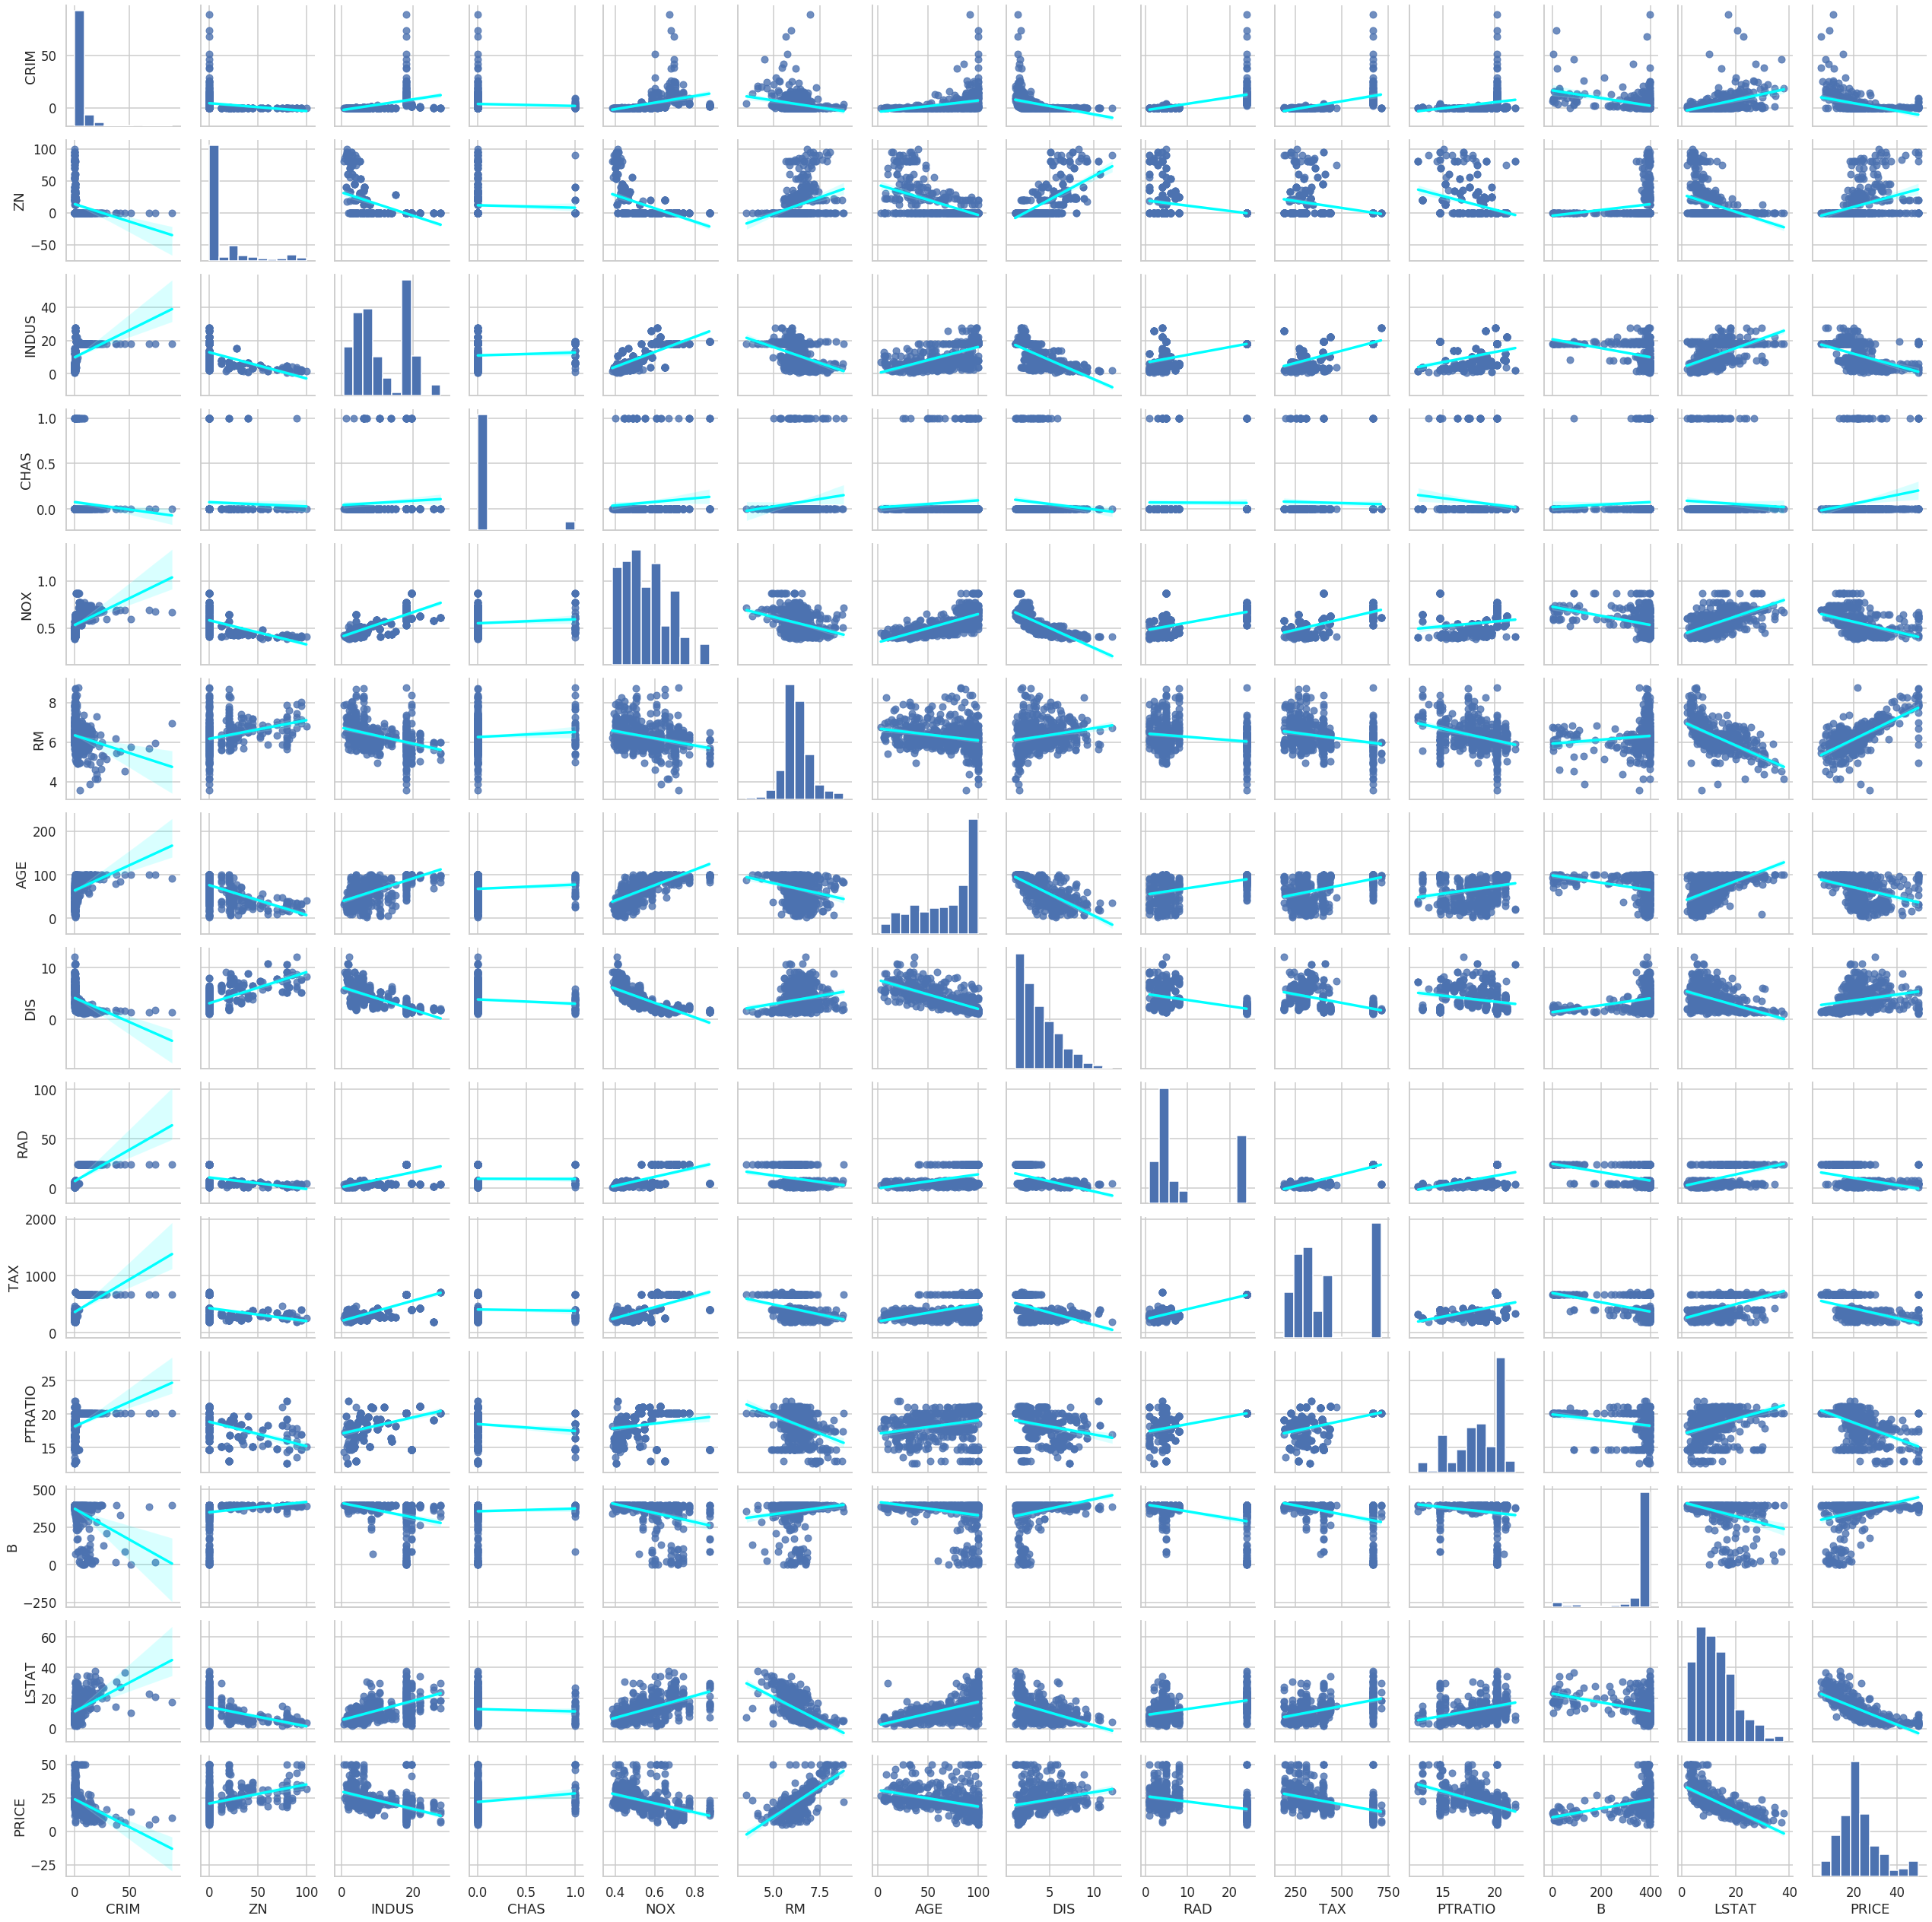

CPU times: user 1min 26s, sys: 17.7 s, total: 1min 44s
Wall time: 1min 23s


In [44]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

### __Training & Test Dataset Split__

In [45]:
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# % of the training set
len(X_train)/len(features)


0.7984189723320159

In [46]:
# % of the test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

### __Multivariable Regression__

In [47]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Print R-Squared for the training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train)) # R-squared shows how much percentage of our Price value we can explain by our 13 features
print('Test data r-squared:', regr.score(X_test, y_test)) # R-squared here lower, because the algorithm hasn't seen the test dataset before

# let's check the coefficient of each feature in our regression model
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115651
Intercept 36.533051382824596


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

When we found all our coefficients we've got the following formula of multivariate regression:

$$PRICE = 36.6 + 3.1*RM - 16.3*NOX - 1.5*DIS +2.0*CHAS + ... - 0.6*LSTAT$$

#### __Data Transformation__
Most useful technic is *Log transformation*

In [48]:
data['PRICE'].skew()

1.1080984082549072

In [49]:
y_log = np.log(data['PRICE']) # transform price values by using log transformation
y_log.head()
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [50]:
y_log.skew()

-0.33032129530987864

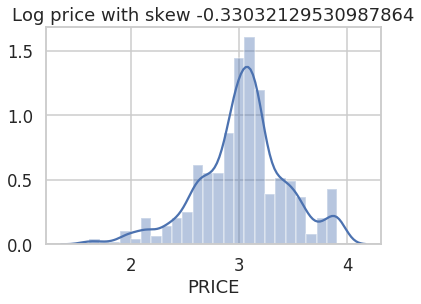

In [51]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

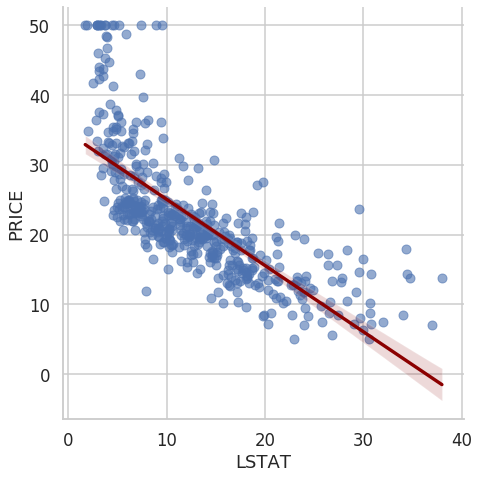

In [52]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color': 'darkred'})
plt.show()

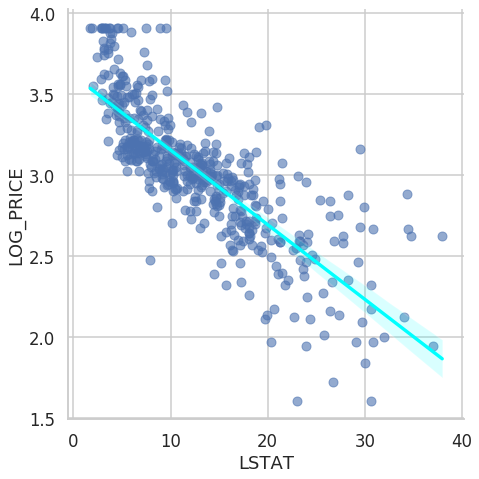

In [53]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color': 'cyan'})
plt.show()

### __Regression using log prices__

In [54]:
prices = np.log(data['PRICE']) # use log prices
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train)) # R-squared shows how much percentage of our Price value we can explain by our 13 features
print('Test data r-squared:', regr.score(X_test, y_test)) # R-squared here lower, because the algorithm hasn't seen the test dataset before

# let's check the coefficient of each feature in our regression model
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260735
Intercept 4.059943871775192


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [55]:
# Charles River Property Premium
np.e**0.080331 # multiply basis of log to CHAS

1.0836456950439142

### __p-values & Evaluating Coefficients__

In [56]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) # OLS - ordinary least square
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

In [0]:
# INDUS and AGE are not statistically significant (their p-values > 0.05)

### __Testing for Multicollinearity__

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [58]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [59]:
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [60]:
# Write a for loop that prints out all the VIFs for all the features
for i in range(X_incl_const.shape[1]):
  print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('All done!')

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000578
4.410320817897635
1.8404053075678575
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364717
2.812544292793036
All done!


In [61]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i)for i in range(X_incl_const.shape[1])] # empty list

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

In [0]:
# for VIF the threshold is VIF > 10. All our numbers above are below 10, so we do not worry about multicollinearity problem 

#### __Model Simplification & the Basian Information Criterion (BIC)__
Remove some of the explanatorial features based on heatmap and p-values.

__(BIC)__ is the way you can measure complexity. Lower number is better when we compare models. So we can delete some features and then compare BICs of two models (before and after feature reduction) and choose the one with the lower BIC number.

In [63]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coeff = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic) # get BIC number
print('R-squared is', results.rsquared)


BIC is -139.74997769478875
R-squared is 0.7930234826697583


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic) # get BIC number
print('R-squared is', results.rsquared)

BIC is -145.1450885559114
R-squared is 0.7927126289415162


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# we've got lower number (-145), but saved our R-squared, which is good

In [66]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coeff = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic) # get BIC number
print('R-squared is', results.rsquared)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


BIC is -149.49934294224678
R-squared is 0.7918657661852815


In [0]:
# we've got further improvement and almost the same R-squared. So we can remove two features (INDUS and AGE)

In [68]:
frames = [org_coeff, coef_minus_indus, reduced_coeff]
pd.concat(frames, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


coef  p-value      coef  p-value      coef  p-value
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
const    4.059944    0.000  4.056231    0.000  4.035922    0.000

### __Residuals & Residual Plots__

__Residuals__ - difference btw the target value and the predicted value. Used to check if assumptions hold and model is valid. Residuals should be __random__ (i.e. no pattern). Residuals should be __normally distributed__.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


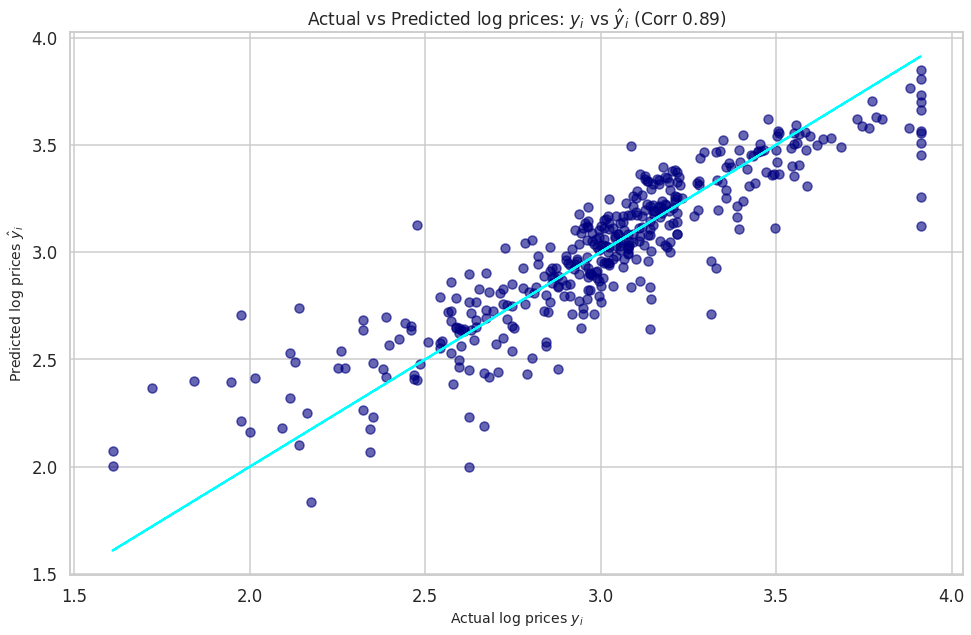

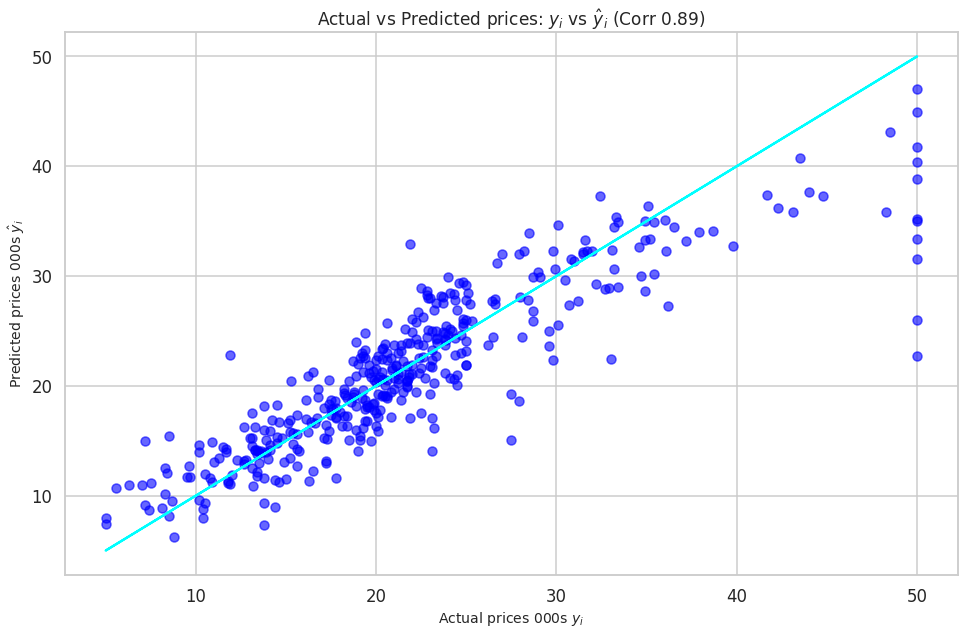

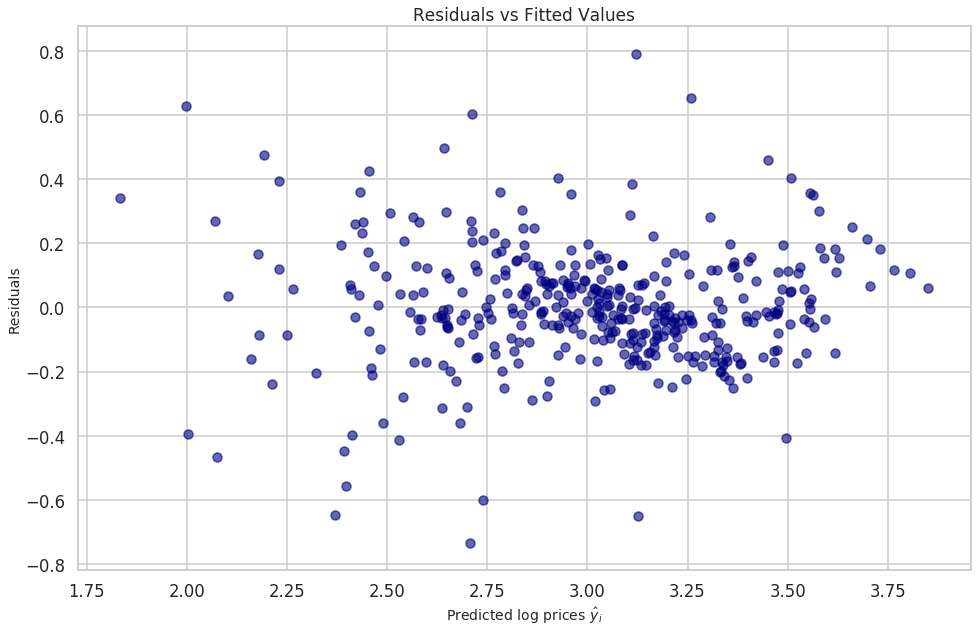

In [69]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# residuals
# results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(16, 10))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# --------------------------------
plt.figure(figsize=(16, 10))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(16, 10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_squared = round(results.rsquared, 3)


In [0]:
# Our scatter looks quite good, no obvious patterns, residuals are centered around zero, fairly cymmetric
# The issue with 50 thousand-price properties

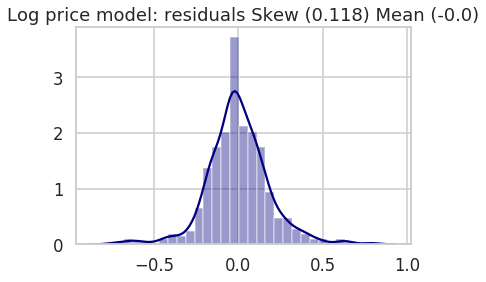

In [71]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


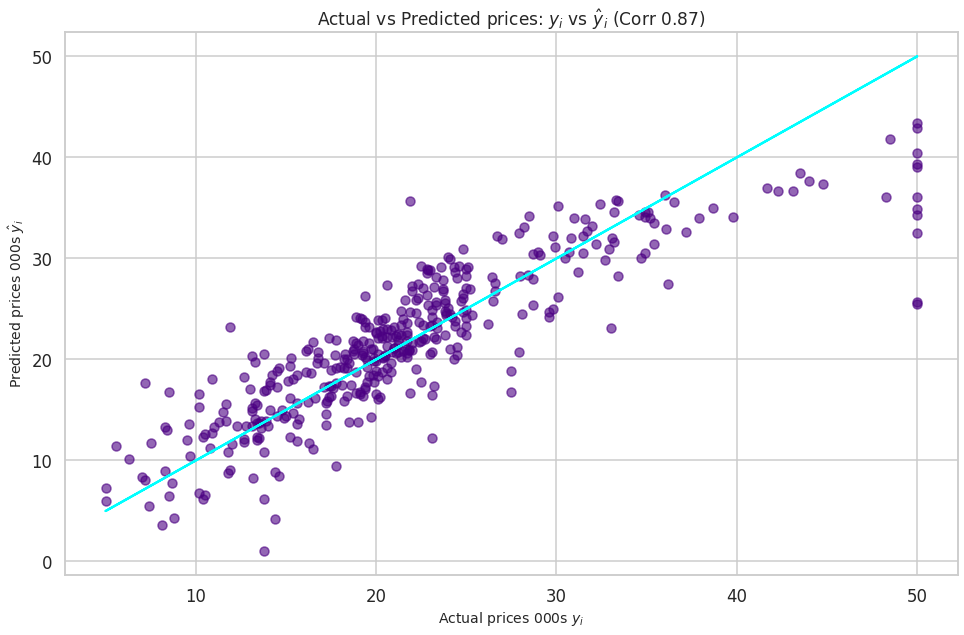

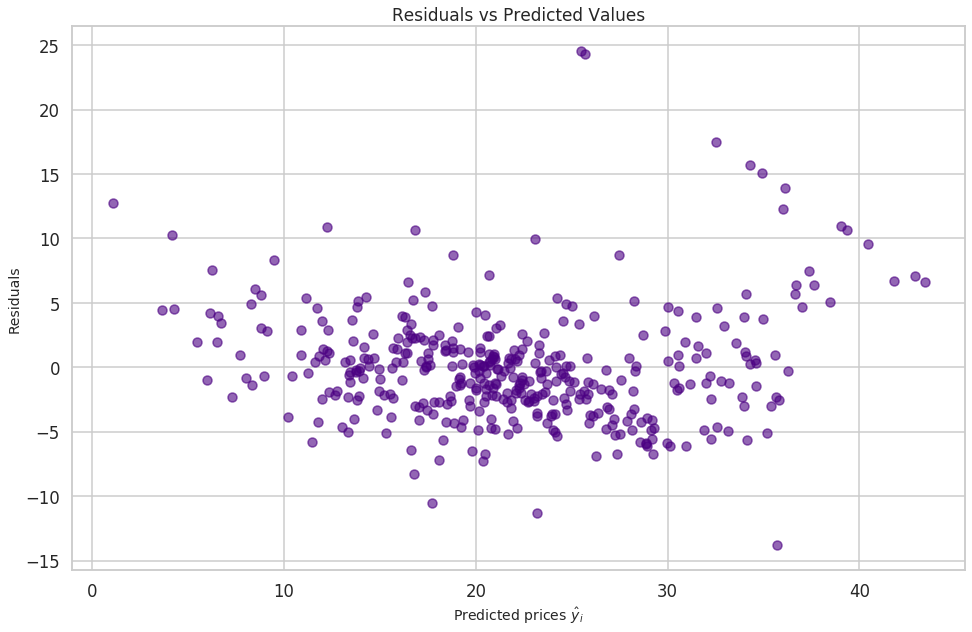

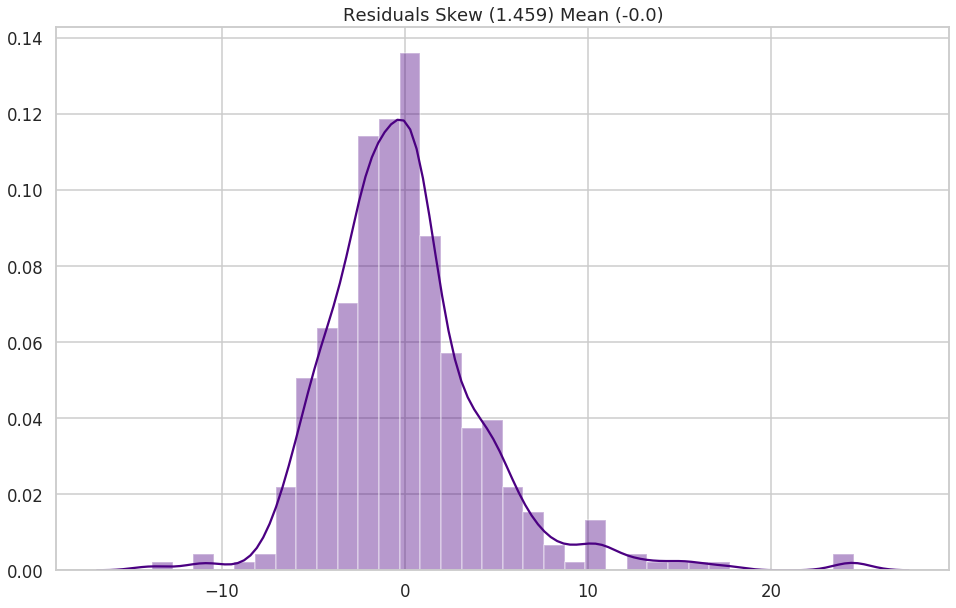

In [72]:
# Using the original model with all the features and normal prices we generate:
# Plot of actual vs predicted prices (incl. correlation) using a different colour
# Plot of residuals vs predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results


# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(16, 10))
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(16, 10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(16, 10))
sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')

plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_squared = round(results.rsquared, 3)



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


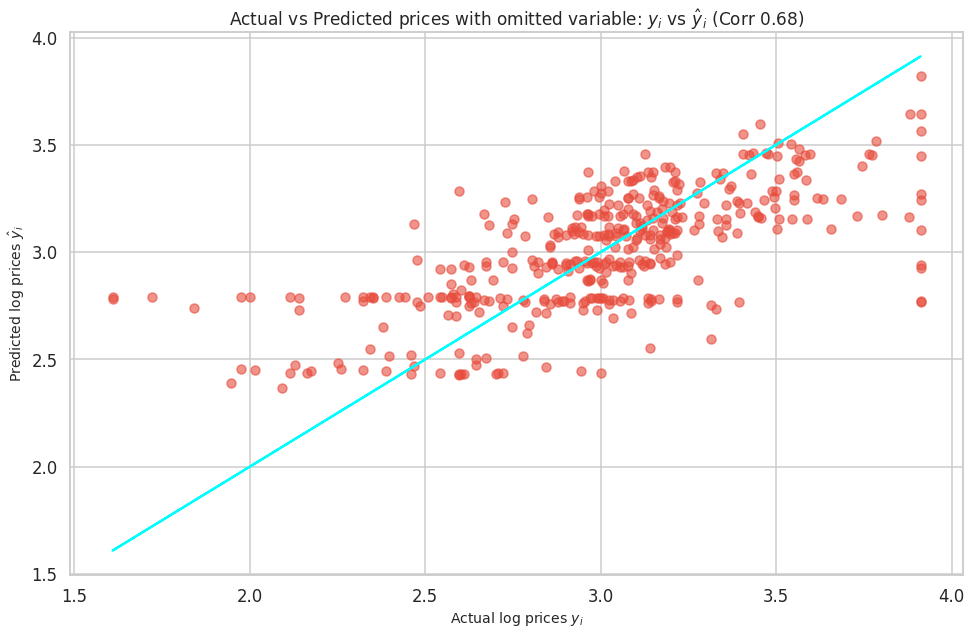

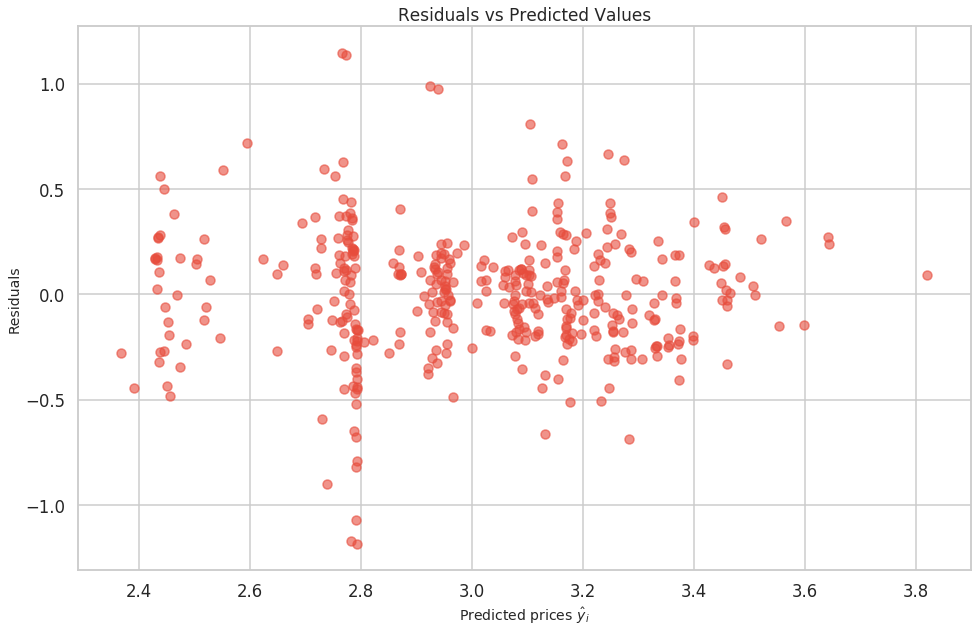

In [73]:
# Model: Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(16, 10))
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variable: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(16, 10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_squared = round(results.rsquared, 3)


In [74]:
pd.DataFrame({'R-Square': [reduced_log_squared, full_normal_squared, omitted_var_squared], 
              'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse]}, 
             index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Square     MSE
Reduced Log Model           0.792   0.035
Full Normal Price Model     0.750  19.921
Omitted Var Model           0.460   0.090

The R-Square above shows that the Reduced Log Model describes the highest percentage of the target values (79%), and has the lowest MSE (lower MSE value is indicate a better fit, i.e. MSE=0 is a perfect fit). MSE measured in absolute values, however we cannot compare MSE of Full Normal Price Model (normal prices) and Reduced Log Model (log) because it has a different scale of measures.

### __Root Mean Squared Error__
__RMSE__ represents one standard deviation of the differences btw the actual and predicted values. Another words __RMSE__ is one std deviation of the distribution of residuals.

In [75]:
pd.DataFrame({'R-Square': [reduced_log_squared, full_normal_squared, omitted_var_squared], 
              'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
              'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
             index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Square     MSE      RMSE
Reduced Log Model           0.792   0.035  0.187083
Full Normal Price Model     0.750  19.921  4.463295
Omitted Var Model           0.460   0.090  0.300000

In [76]:
# Suppose our estimate for a house is $30,000. Let's calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is', lower_bound)
print('The upper bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is 3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The upper bound in log prices for a 95% prediction interval is 3.0270316429847615
The upper bound in normal prices is $ 20635.886906824155


In [77]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong: Add first. Transform afterwards

31453.778077746647